## Description:

This file contains:
* clustering to find out number/nature of natural grouping within the data

In [1]:
'''Helper''' 
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.1f' % x)
import numpy as np
import time
import joblib

from gcs_utils import *

ModuleNotFoundError: No module named 'gcs_utils'

In [2]:
# import umap
# import hdbscan

In [2]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
BUCKET_NAME = 'bi-subscription-modeling'
BUCKET_FOLDER = 'train-val-data/pv1-filter-train-val'
file_name = 'pv1_training_data_01062022.csv'

download_file(BUCKET_NAME, 
              BUCKET_FOLDER, 
              file_name) 

**Training data**

In [3]:
# read training data

df = pd.read_csv('pv1_training_data_01062022.csv', dtype={'ga_fullvisitorid': object})

print(df.shape)
print(df.isna().sum().unique())
df.dtypes.value_counts()

(506819, 569)
[0]


float64    565
object       2
int64        2
dtype: int64

In [4]:
df.head()

,ga_fullvisitorid,session_pvs_mean,session_pvs_median,session_top_mean,session_top_median,bounce_rate,content_views_rate,rf_content_aggregators,rf_direct,rf_fbia,...,hour_15_top,hour_16_top,hour_17_top,hour_18_top,hour_19_top,hour_20_top,hour_21_top,hour_22_top,hour_23_top,subscription_status
0,10000008659404174067,2.0,2.0,90.0,90.0,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0,non_subscriber
1,1000005318256837109,1.0,1.0,889.5,889.5,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non_subscriber
2,10000099310184199031,1.0,1.0,263.0,319.0,1.0,1.0,0.0,0.0,0.0,...,0.0,319.0,0.0,527.0,366.0,0.0,0.0,0.0,0.0,non_subscriber
3,10000101531876397645,1.0,1.0,820.0,820.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non_subscriber
4,10000193311213787727,1.0,1.0,124.0,124.0,1.0,1.0,2.0,0.0,0.0,...,0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,non_subscriber


In [5]:
df.subscription_status.value_counts()

non_subscriber    409924
subscriber         96895
Name: subscription_status, dtype: int64

* Fill NA
* Drop unnecesary cols
* Encode target variable

In [6]:
# fill any Nulls with 0

df.fillna(0, inplace=True)

# drop unnecessary cols
cols_to_drop = [x for x in df.columns if 'other' in x] + ['ga_fullvisitorid']

df = df.drop(cols_to_drop, 
             axis=1)

# encode target - subs class 1, everyone else class 0

df['subscription_status'] = np.where(df['subscription_status']=='subscriber',
                                     1, 0)

df.subscription_status.value_counts(normalize=True)*100

0   80.9
1   19.1
Name: subscription_status, dtype: float64

In [7]:
feat_selected = joblib.load("subs_feat_selected.joblib")

* Clustering both class

In [8]:
to_drop = ['session_pvs_median', 'session_top_median', 't2_auto_type_pvs', 't2_business_pvs', 't2_college_education_pvs', 't2_computing_pvs',  
           't2_diseases_and_conditions_pvs', 't2_email_pvs', 't2_politics_pvs', 't2_real_estate_buying_and_selling_pvs', 't2_travel_type_pvs', 't2_world_movies_pvs']

data = df[df.columns[~df.columns.isin(to_drop + ['subscription_status'])]]
data.shape

(506819, 548)

In [11]:
data

,session_pvs_mean,session_top_mean,bounce_rate,content_views_rate,rf_content_aggregators,rf_direct,rf_fbia,rf_newsletter,rf_organic_search,rf_organic_social_dark,...,hour_14_top,hour_15_top,hour_16_top,hour_17_top,hour_18_top,hour_19_top,hour_20_top,hour_21_top,hour_22_top,hour_23_top
0,2.0,90.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,0.0
1,1.0,889.5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,263.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,319.0,0.0,527.0,366.0,0.0,0.0,0.0,0.0
3,1.0,820.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,124.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506814,1.0,41.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
506815,1.5,137.2,0.5,1.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,274.5,0.0,0.0,0.0,0.0,0.0,0.0
506816,1.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0
506817,1.0,17.7,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0


In [9]:
from sklearn.preprocessing import RobustScaler
scaled_data = RobustScaler().fit_transform(data)

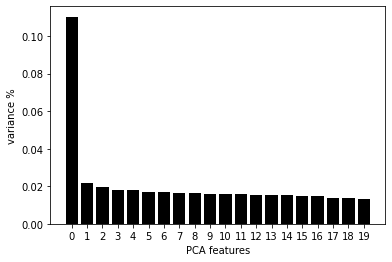

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pc_out = pca.fit_transform(scaled_data)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components = pd.DataFrame(pc_out) 

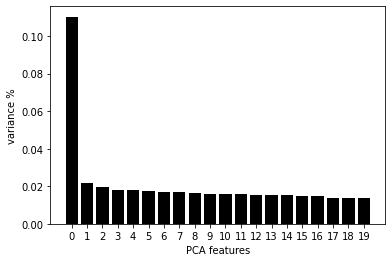

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pc_out = pca.fit_transform(scaled_data)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components = pd.DataFrame(pc_out) 

In [14]:
final_pca = PCA(n_components=2)
reduced_data = final_pca.fit_transform(scaled_data)

print('Explained variation per principal component: {}'.format(final_pca.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(final_pca.explained_variance_ratio_)))

Explained variation per principal component: [0.11031945 0.02148733]
Cumulative variance explained by 2 principal components: 13.18%


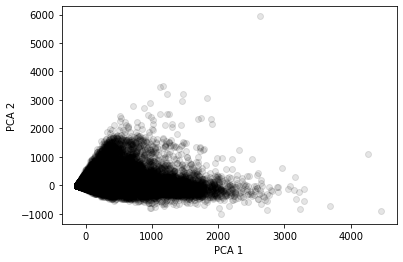

In [15]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

* **k-Means**
    * The silhouette score is a measure of cluster seperation and similarity
    
    * Silhouette Samples show the per data point silhouette score wihtin a cluster (left). The coloured bars are the data points within eac cluster, where width is the data point silhouette score. The vertical dashed line is the average score per data point across all clusters. The cluster bard group height indicates the size of the cluster. Clusters and samples with “noisy” silhouette plots in terms of unequal widths and heights indicates poor clustering.

In [21]:
from sklearn.decomposition import PCA

def pca(df_scaled):
    """
    To reduce the dimensions of the wine dataset we use Principal Component Analysis (PCA).
    Here we reduce it from 13 dimensions to 2.
    :param df_scaled: scaled data
    :return: pca result, pca for plotting graph
    """

    pca_2 = PCA(n_components=2)
    pca_2_result = pca_2.fit_transform(df_scaled)
    print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
    print('Cumulative variance explained by 2 principal components: {:.2%}'.format(
        np.sum(pca_2.explained_variance_ratio_)))
    return pca_2_result, pca_2

In [26]:
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans

def kmean_hyper_param_tuning(data):
    """
    Hyper parameter tuning to select the best from all the parameters on the basis of silhouette_score.
    :param data: dimensionality reduced data after applying PCA
    :return: best number of clusters for the model (used for KMeans n_clusters)
    """
    # candidate values for our number of cluster
    parameters = [2, 3, 4, 5]

    # instantiating ParameterGrid, pass number of clusters as input
    parameter_grid = ParameterGrid({'n_clusters': parameters})

    best_score = -1
    kmeans_model = KMeans()     # instantiating KMeans model
    silhouette_scores = []

    # evaluation based on silhouette_score
    for p in parameter_grid:
        kmeans_model.set_params(**p)    # set current hyper parameter
        kmeans_model.fit(data)          # fit model on wine dataset, this will find clusters based on parameter p

        ss = metrics.silhouette_score(data, kmeans_model.labels_)   # calculate silhouette_score
        silhouette_scores += [ss]       # store all the scores

        print('Parameter:', p, 'Score', ss)

        # check p which has the best score
        if ss > best_score:
            best_score = ss
            best_grid = p

    # plotting silhouette score
    plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
    plt.xticks(range(len(silhouette_scores)), list(parameters))
    plt.title('Silhouette Score', fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.show()

    return best_grid['n_clusters']

In [ ]:
def visualizing_results(pca_result, label, centroids_pca):
    """ 
    Visualizing the clusters
    :param pca_result: PCA applied data
    :param label: K Means labels
    :param centroids_pca: PCA format K Means centroids
    """
    # ------------------ Using Matplotlib for plotting-----------------------
    x = pca_result[:, 0]
    y = pca_result[:, 1]

    plt.scatter(x, y, c=label, alpha=0.5, s= 200)  # plot different colors per cluster
    plt.title('Wine clusters')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black", lw=1.5)

    plt.show()

* k-Means :: just the subs

In [58]:
input_df = df.copy() 

# CASE1 - consider only subs to cluster on
input_df = input_df[input_df.subscription_status==1]
# CASE1 - consider only feat selected columns to cluster with
input_df = input_df[feat_selected]

input_df[input_df.columns] = StandardScaler().fit_transform(input_df)

In [59]:
start = time.time()

pca_result, pca_2 = pca(input_df)

print('Took {} seconds to run'.format(round(time.time() - start)))

Explained variation per principal component: [0.1780941  0.07183206]
Cumulative variance explained by 2 principal components: 24.99%
Took 1 seconds to run


Parameter: {'n_clusters': 2} Score 0.8594973815026917
Parameter: {'n_clusters': 3} Score 0.7818065118565759
Parameter: {'n_clusters': 4} Score 0.2525929149428077
Parameter: {'n_clusters': 5} Score 0.25261907721512145


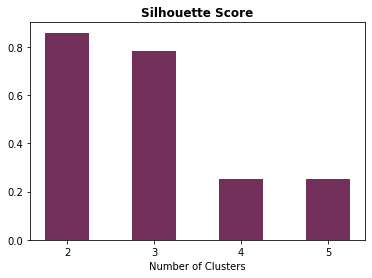

optimum num of clusters = 2
Took 361 seconds to run


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


In [60]:
start = time.time()

optimum_num_clusters = kmean_hyper_param_tuning(input_df)
print("optimum num of clusters =", optimum_num_clusters)

# fitting KMeans
kmeans = KMeans(n_clusters=optimum_num_clusters)
kmeans.fit(input_df)
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids) 

print('Took {} seconds to run'.format(round(time.time() - start)))

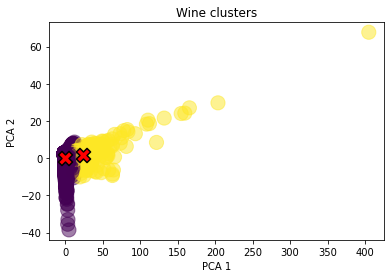

Took 2 seconds to run


In [61]:
start = time.time()

visualizing_results(pca_result, kmeans.labels_, centroids_pca)

print('Took {} seconds to run'.format(round(time.time() - start)))

In [62]:
s_clustered = df[df.subscription_status==1].copy()
s_clustered["cluster_id"] = kmeans.labels_
s_clustered.to_csv("test_s_clusters.csv", index=False)

* EDA

In [67]:
s_clustered.cluster_id.value_counts()

0    96200
1      695
Name: cluster_id, dtype: int64

In [66]:
s_clustered.groupby('cluster_id')[['session_pvs_mean', 'session_top_median', 'bounce_rate', 'content_views_rate']].describe().T

cluster_id                     0      1
session_pvs_mean   count 96200.0  695.0
                   mean      2.3    2.9
                   std       4.7    1.8
                   min       1.0    1.0
                   25%       1.3    1.9
                   50%       1.7    2.4
                   75%       2.4    3.4
                   max     356.0   28.0
session_top_median count 96200.0  695.0
                   mean     99.0   75.7
                   std     141.9  111.8
                   min       0.0    3.0
                   25%      30.5   28.0
                   50%      62.2   50.6
                   75%     112.0   88.0
                   max    7119.0 1390.0
bounce_rate        count 96200.0  695.0
                   mean      0.6    0.4
                   std       0.3    0.2
                   min       0.0    0.0
                   25%       0.4    0.3
                   50%       0.6    0.4
                   75%       0.8    0.6
                   max       1.0    1.0
content_views_rate count 96200.0  695.0
                   mean      0.7    0.6
                   std       0.3    0.2
                   min       0.0    0.0
                   25%       0.6    0.5
                   50%       0.8    0.6
                   75%       1.0    0.8
                   max       1.0    1.0

In [90]:
# Using the K-Means++ algorithm, we optimize the step where we randomly pick the cluster centroid. 
# We are more likely to find a solution that is competitive to the optimal K-Means solution while using the K-Means++ initialization

kmeans = KMeans(n_clusters=3) # , init='k-means++'
kmeans.fit(input_df)
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids) 
s2_clustered = df[df.subscription_status==1].copy()
s2_clustered["cluster_id"] = kmeans.labels_

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


In [91]:
s2_clustered.groupby('cluster_id')[['session_pvs_mean', 'session_top_mean', 'bounce_rate', 'content_views_rate']].describe().T

cluster_id                     0      1       2
session_pvs_mean   count 64865.0  480.0 31550.0
                   mean      2.4    3.1     1.9
                   std       5.5    2.0     1.9
                   min       1.0    1.0     1.0
                   25%       1.3    2.0     1.3
                   50%       1.8    2.6     1.6
                   75%       2.6    3.6     2.1
                   max     356.0   28.0   180.0
session_top_mean   count 64865.0  480.0 31550.0
                   mean    114.5  200.4   270.0
                   std      86.3  205.9   209.4
                   min       0.0   37.9    20.7
                   25%      57.9  115.6   159.3
                   50%      96.0  153.0   216.0
                   75%     145.6  209.8   309.1
                   max    1120.0 2059.9  7119.0
bounce_rate        count 64865.0  480.0 31550.0
                   mean      0.5    0.4     0.6
                   std       0.3    0.2     0.2
                   min       0.0    0.0     0.0
                   25%       0.3    0.3     0.5
                   50%       0.6    0.4     0.7
                   75%       0.8    0.5     0.8
                   max       1.0    1.0     1.0
content_views_rate count 64865.0  480.0 31550.0
                   mean      0.7    0.6     0.8
                   std       0.3    0.2     0.2
                   min       0.0    0.0     0.0
                   25%       0.5    0.5     0.7
                   50%       0.7    0.6     0.9
                   75%       0.9    0.8     1.0
                   max       1.0    1.0     1.0

In [92]:
s2_clustered['Binary Cluster 0'] = s2_clustered['cluster_id'].map({0:1, 1:0, 2:0})
print("\n", s2_clustered["Binary Cluster 0"].value_counts())


 1    64865
0    32030
Name: Binary Cluster 0, dtype: int64


In [104]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(s2_clustered.iloc[:, :-3].values, s2_clustered["Binary Cluster 0"].values)

# Index sort the most important features
sorted_feature_weight_idxes = np.argsort(clf.feature_importances_)[::-1] # Reverse sort

# Get the most important features names and weights
most_important_features = np.take_along_axis(
    np.array(s2_clustered.iloc[:, :-3].columns.tolist()), 
    sorted_feature_weight_idxes, axis=0)
most_important_weights = np.take_along_axis(
    np.array(clf.feature_importances_), 
    sorted_feature_weight_idxes, axis=0)

# Show
list(zip(most_important_features, most_important_weights)) #3.59

[('weekday_top', 0.08464509342745595),
 ('business_hours_top', 0.07634723003724524),
 ('session_top_mean', 0.06993766555645944),
 ('t1_business_and_finance_top', 0.03869998861528446),
 ('non_business_hours_top', 0.0375867985379604),
 ('monday_top', 0.030184258753191435),
 ('thursday_top', 0.0270191973210478),
 ('wednesday_top', 0.024777118910519556),
 ('weekend_top', 0.021518914194177122),
 ('friday_top', 0.020548175390439995),
 ('t1_business_and_finance_pvs', 0.019523771655509902),
 ('tuesday_top', 0.017521835156583197),
 ('ct_united_states', 0.0169049622037795),
 ('weekday_pvs', 0.015259888808911154),
 ('t2_business_pvs', 0.014986645292932676),
 ('sunday_top', 0.013228346157378506),
 ('session_top_median', 0.012387714966292252),
 ('hour_13_top', 0.011786325924685254),
 ('hour_10_top', 0.011080940432849162),
 ('business_hours_pvs', 0.009877287511181316),
 ('hour_11_top', 0.00981278532188939),
 ('rf_organic_search', 0.00972030265811416),
 ('hour_16_top', 0.009622995337318883),
 ('hour_

* k-Means :: just the non-subs

In [32]:
input_df = df.copy() 

# CASE1 - consider only subs to cluster on
input_df = input_df[input_df.subscription_status==0]
# CASE1 - consider only feat selected columns to cluster with
input_df = input_df[feat_selected]

input_df[input_df.columns] = StandardScaler().fit_transform(input_df)

In [33]:
start = time.time()

pca_result, pca_2 = pca(input_df)

print('Took {} seconds to run'.format(round(time.time() - start)))

Explained variation per principal component: [0.15076578 0.06039809]
Cumulative variance explained by 2 principal components: 21.12%
Took 2 seconds to run


Parameter: {'n_clusters': 2} Score 0.6667977942560722
Parameter: {'n_clusters': 3} Score 0.4285858027721758
Parameter: {'n_clusters': 4} Score 0.43143143516318183
Parameter: {'n_clusters': 5} Score 0.37101995201076476


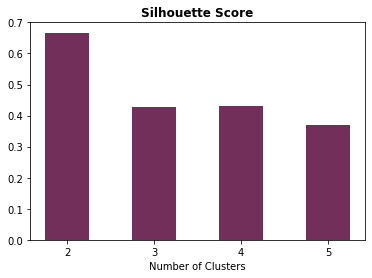

optimum num of clusters = 2
Took 5821 seconds to run


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


In [34]:
start = time.time()

optimum_num_clusters = kmean_hyper_param_tuning(input_df)
print("optimum num of clusters =", optimum_num_clusters)

# fitting KMeans
kmeans = KMeans(n_clusters=optimum_num_clusters)
kmeans.fit(input_df)
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids) 

print('Took {} seconds to run'.format(round(time.time() - start)))

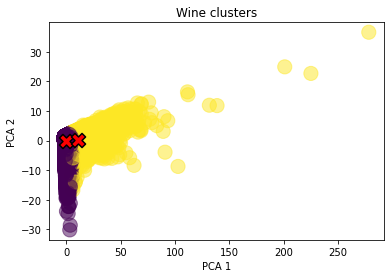

Took 7 seconds to run


In [35]:
start = time.time()

visualizing_results(pca_result, kmeans.labels_, centroids_pca)

print('Took {} seconds to run'.format(round(time.time() - start)))

In [56]:
ns_clustered = df[df.subscription_status==0][feat_selected].copy()
ns_clustered["cluster_id"] = kmeans.labels_

In [57]:
ns_clustered.to_csv("test_ns_clusters.csv", index=False)

* notes

In [ ]:
# Since latitude and longitude don't follow a specific distribution, convert the latitude and longitude information 
# into quantiles. Display the last few rows to verify the quantile values.

numQuantiles = 20
colsQuantiles = ['maker_lat', 'maker_long', 'origin_lat', 'origin_long']

def createQuantiles(dfColumn, numQuantiles):
  return pd.qcut(dfColumn, numQuantiles, labels=False, duplicates='drop')

# Bring quantile values to the same scale as other feature data by scaling them to [0,1].
for string in colsQuantiles:
  choc_data[string] = createQuantiles(choc_data[string], numQuantiles)
  
choc_data.tail()

def minMaxScaler(numArr):
  minx = np.min(numArr)
  maxx = np.max(numArr)
  numArr = (numArr - minx) / (maxx - minx)
  return numArr


for string in colsQuantiles:
  choc_data[string] = minMaxScaler(choc_data[string])

* UMAP + HDBSCAN

In [19]:
# dimensionality reduction
umap_obj = umap.UMAP(n_neighbors=15, 
                     n_components=5, 
                     metric='euclidean').fit_transform(input_df) #min_dist=0.0, #7mins

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


In [20]:
# cluster
cluster = hdbscan.HDBSCAN(min_cluster_size=5,
                          metric='euclidean').fit(umap_obj) #, cluster_selection_method='eom'

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:


# # plot clusters and outliers
# # prepare data  - reduce to 2D for the purpose of plotting
# umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(article_embeddings)
# result = pd.DataFrame(umap_data, columns=['x', 'y'])
# result['labels'] = cluster.labels_

# # Visualize clusters
# fig, ax = plt.subplots(figsize=(20, 10))
# outliers = result.loc[result.labels == -1, :]
# clustered = result.loc[result.labels != -1, :]
# plt.scatter(outliers.x, outliers.y, color='#BDBDBD') #, s=20 lw=10
# plt.scatter(clustered.x, clustered.y, c=clustered.labels, cmap='hsv_r') # s=0.05, lw=10
# plt.colorbar()

In [ ]:
def algo_article_embed(data):
    
    # get embeddings
    # embeddings = model.encode(data)
    
    article_embeddings = []
    for article_body in data:

        embedding_sent = []
        art_sentences = sent_tokenize(article_body)
        for sent in art_sentences:
            embedding_sent.append(model.encode(sent))

        art_embed = np.mean(embedding_sent, axis=0)

        article_embeddings.append(art_embed) 
    print("article_embeddings len:", len(article_embeddings))

    
    
    # put topics in dataframe
    docs_df = pd.DataFrame(data, columns=["Doc"])
    docs_df['Topic'] = cluster.labels_
    docs_df['Doc_ID'] = range(len(docs_df))
    
    # combine together all articles belonging to same cluster  
    docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})
    
    # calculate countVector and tf-idf
    tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))
    
    # top n words, topic size
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
    topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)
    
    return docs_df, top_n_words, topic_sizes